<a href="https://colab.research.google.com/github/vritansh/ML_from_Scratch/blob/master/algorithms_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
diabetes = datasets.load_diabetes()
breast_cancer = datasets.load_breast_cancer()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from collections import Counter
import seaborn as sns
from sklearn.metrics import log_loss


In [ ]:
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.2)

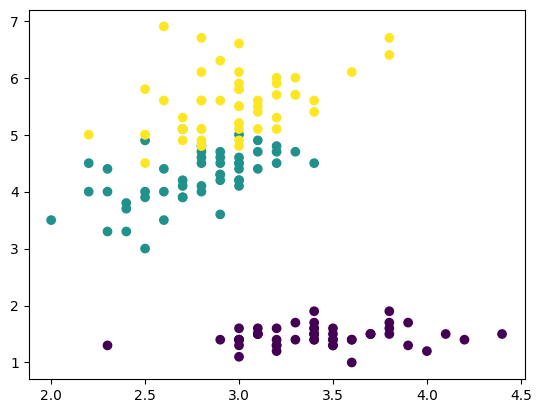

In [ ]:
plt.scatter(X[:,1],X[:,2], c=y )

### K-nearest neighbors from scratch : Nearest neighbors to eucledian distance

In [ ]:

class KNN:

    def eucledian_distance(self, x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
          self.X_train = X
          self.y_train = y

    def predict(self, X):
          predictions = []
          for x in X :
              distances = [ self.eucledian_distance(x, x_train) for x_train in self.X_train]
              predictions.append(  Counter(self.y_train[np.argsort(distances)[:self.k]]).most_common()[0][0] )

          return predictions




In [ ]:
knn = KNN()
knn.fit(X,y)
y_pred = knn.predict(X)
accuracy_score(y_pred,y)

0.96

### Linear Regression

In [ ]:
## Gradient Descent based approach

class LinearRegression:


  def __init__(self, lr=0.001, n_iter=100):
      self.lr = lr
      self.n_iter = n_iter
      self.w = None
      self.b = None


  def fit(self, X,y):

      self.X = X
      self.y = y.reshape(-1,1)

      self.w = np.zeros( X.shape[1]).reshape(-1,1)
      self.b = 0

      mse = []

      for i in range(0, self.n_iter):
        ## Shape of X - M X N, Shape of W - N X M =
          y_hat = np.dot( self.X, self.w) + self.b

          assert y_hat.shape == self.y.shape

          dw =  (1 / len(self.X )) * np.dot( self.X.T , (y_hat - self.y) )
          db =  (1 / len(self.X )) * np.sum( y_hat - self.y )

          self.w = self.w - self.lr * dw
          self.b = self.b - self.lr * db

          mse.append(mean_squared_error(y_hat, self.y))

      plt.plot(mse)
      plt.show()
      return mse

  def predict(self, X):

      return np.dot( X, self.w) + self.b



In [ ]:
X = diabetes.data
y = diabetes.target

X,y = datasets.make_regression(10000,10)

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
lr = LinearRegression()

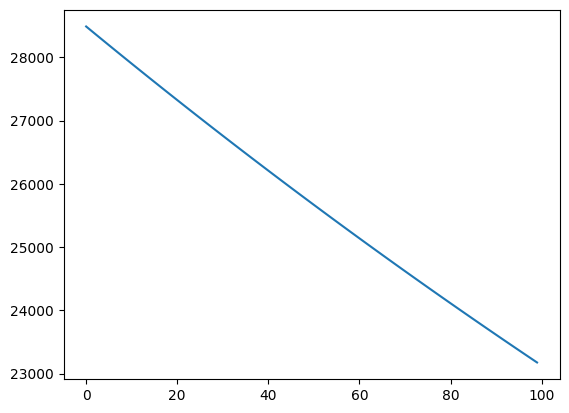

In [ ]:
mse = lr.fit(X_train ,y_train)

In [ ]:
y_pred = lr.predict(X_test)

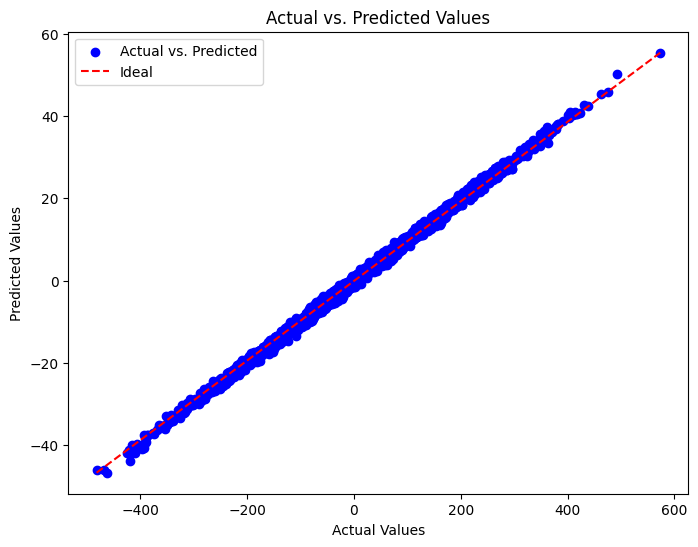

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', label='Ideal')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()


plt.show()

### Lasso Regression from Sratch

### Lasso Regression
1. Adds L1 Penalty to the MSE by a factor lambda

### Ridge Regression
1. Adds L2 Penalty to mse by a factor of lambda

If the penatly is L1 and L2 then a new term with Lambda * coefficient of the feature*  or | lambda * (coefficient of feature ) *2 is added respectively.

So mean squared error in three cases would be
1. OLS.  : MSE
2. Lasso. : MSE + L*w
3. Ridge. : MSE + L*w^2

So the features which have high deviation from the actual value would be penalized more since their coefficients would result in a larger MSE and added penalty would also result in more penalty.

### Logistic Regression

In [ ]:
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [ ]:
class LogisticRegression:

  def __init__(self,lr=0.001, iters = 1000):

      self.lr = lr
      self.iters = iters
      self.w = None
      self.b = None


  def find_labels(self, prob):
    y_pred = [0 if i < 0.5 else 1 for i in prob]

    return y_pred

  def sigmoid(self, z):

    return 1 / (1 + np.exp(-z))

  def fit(self, X , y):

      y = y.reshape(-1,1)
      length, features = X.shape

      self.w = np.zeros(features).reshape(-1,1)
      self.b = 0

      ce_loss = []

      for i in range(0,self.iters):

        z = np.dot(X, self.w) + self.b
        y_hat = self.sigmoid(z)

        dw =  (1 / len(X )) * np.dot( X.T , (y_hat - y) )
        db =  (1 / len(X )) * np.sum( y_hat - y )

        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db

      #   ce_loss.append(log_loss( y_hat, y ))

      # plt.plot(ce_loss)
      # plt.show()

  def predict(self, X):
        z_pred = np.dot(X, self.w) + self.b
        z_proba = self.sigmoid(z_pred)
        y_pred = self.find_labels(z_proba)
        return y_pred


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

<ipython-input-66-7af6a414756e>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [ ]:
y_pred_test = lr.predict(X_test)

<ipython-input-66-7af6a414756e>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [ ]:
accuracy_score(y_pred_test, y_test)

0.956140350877193